In [3]:
from fastai.text import *

In [4]:
path = Path.cwd()/'data'

In [6]:
bs=48

In [8]:
# data_lm = TextLMDataBunch.from_folder(path, fname)

data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
#             .filter_by_folder(include=<str or list>) # Only txt files from specific folders
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [ ]:
# Load a saved language model
# data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [9]:
data_lm.show_batch()

idx,text
0,"for its object the best possible , and is itself the most excellent , and comprehends all the rest . xxmaj now this is called a city , and the society thereof a political society ; for those who think that the principles of a political , a regal , a family , and a herile government are the same are mistaken , while they suppose that each of these"
1,"those purposes , and others for the other , and there are many species of both sorts . xxmaj and the better those are who are governed the better also is the government , as for instance of man , rather than the brute creation : for the more excellent the materials are with which the work is finished , the more excellent certainly is the work ; and wherever"
2,"men ; those who live near xxunk and xxunk and rivers , or the sea itself , on xxunk , while others are xxunk , or xxunk of wild beasts ; but the greater part of mankind live upon the produce of the earth and its cultivated fruits ; and the manner in which all those live who follow the direction of nature , and labour for their own subsistence"
3,", and where , and how ; as for instance , what advantage will arise from keeping horses , or xxunk , or xxunk , or any other live stock ; it is also necessary to be acquainted with the xxunk value of these things , and which of them in particular places are worth most ; for some do better in one place , some in another . xxmaj"
4,"well governed ; and if there should be any others which some persons have described , and which appear properly regulated , to note what is right and useful in them ; and when we point out wherein they have failed , let not this be xxunk to an xxunk of wisdom , for it is because there are great defects in all those which are already established , that"


From fastai:

We can then put this in a learner object very easily with a model loaded with the pretrained weights. They'll be downloaded the first time you'll execute the following line and stored in `~/.fastai/models/` (or elsewhere if you specified different paths in your config file).

In [10]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


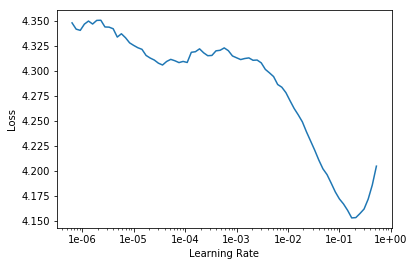

In [11]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [12]:
learn.fit_one_cycle(2, 3e-3, moms=(0.8,0.7))

In [13]:
learn.save('fit_head')

In [ ]:
# learn.load('fit_head');

In [14]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


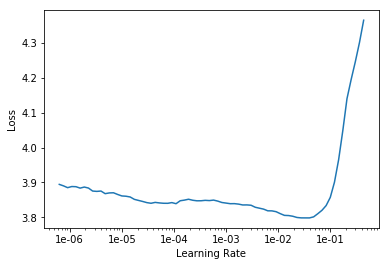

In [15]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [16]:
learn.fit_one_cycle(10, slice(1e-5, 3e-3), moms=(0.8,0.7))

In [17]:
learn.save('stage-2')

In [ ]:
# learn.load('stage-2');

In [20]:
learn.predict("It has been said", n_words=40)

'It has been said , this is the fourth time that a Square Arms and a entirely new state avoid any proposed change in their mode of accounts ; for this purpose the Of This mode is their first ,'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


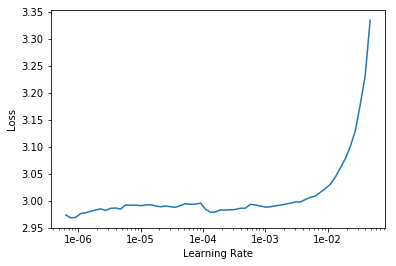

In [21]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [22]:
learn.fit_one_cycle(10, slice(1e-6, 1e-4), moms=(0.8,0.7))

In [23]:
learn.save('stage-3')

In [ ]:
# learn.load('stage-3');

In [24]:
learn.predict("It has been said", n_words=40)

"It has been said that i.e. suits were said in other arts to deal with individual acts . On the other hand , upon all of we ' d had no particular name , ' they use ' in - king rules '"

In [25]:
learn.export('export-v2.pkl')